# Dasar Text-Preprocessing dengan Python#
Text data needs to be cleaned and encoded to numerical values before giving them to machine learning models, this process of cleaning and encoding is called as text preprocessing.

---

## Case Folding: Lowercase ##
Merubah format teks menjadi format huruf kecil semua (_lowercase_).

In [3]:
kalimat = "Coba Kata Ini TEST"
lower_case = kalimat.lower()
print(lower_case)


coba kata ini test


## Case Folding: Removing Number ##
Menghapus karakter angka.

In [5]:
import re
kalimat = "Saya membeli 5 apel."

hasil = re.sub(r"\d+", "", kalimat)
hasil

'Saya membeli  apel.'

## Case Folding: Removing Punctuation ##
Menghapus karakter tanda baca.

In [7]:
import string

kalimat = "Ibu menyuruh [aku] membeli apel!! tapi aku menolaknya()"
hasil = kalimat.translate(str.maketrans("","",string.punctuation))
hasil

'Ibu menyuruh aku membeli apel tapi aku menolaknya'

## Case Folding: Removing Whitespace ##
Menghapus karakter kosong.

In [8]:
kalimat = " \t    ini kalimat contoh \t   \n"
hasil = kalimat.strip()

hasil

'ini kalimat contoh'

## Separating Sentences with Split () Method ##
Fungsi `split()` memisahkan _string_ ke dalam _list_ dengan spasi sebagai pemisah jika tidak ditentukan pemisahnya.

https://www.w3schools.com/python/ref_string_split.asp

In [9]:
kalimat = "aku dia dan kalian adalah teman"
pisah = kalimat.split()

pisah

['aku', 'dia', 'dan', 'kalian', 'adalah', 'teman']

## Tokenizing: Word Tokenizing Using NLTK Module ##
Menggunakan _library_ NLTK untuk memisahkan kata dalam sebuah kalimat.


In [14]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

kalimat = "Aku selalu membeli makanan di warung depan rumah."

tokens = nltk.tokenize.word_tokenize(kalimat)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
tokens

['Aku', 'selalu', 'membeli', 'makanan', 'di', 'warung', 'depan', 'rumah', '.']

## Tokenizing with Case Folding ##
Menggabungkan teknik _Case Foling_ dengan _Tokenizing_.

In [17]:
from nltk.tokenize import word_tokenize

kalimat = "Aku mencintai dia tapi boong."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

tokens = nltk.tokenize.word_tokenize(kalimat)

tokens

['aku', 'mencintai', 'dia', 'tapi', 'boong']

## Frequency Distribution ##
Menghitung frekuensi kemunculan setiap tokens(kata) dalam teks.

In [19]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

kalimat = "Aku selalu membeli makanan di warung depan rumah. Tapi sayang warung depan selalu tutup ketika aku datang."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

tokens = nltk.tokenize.word_tokenize(kalimat)
kemunculan = nltk.FreqDist(tokens)

print(kemunculan.most_common())

[('aku', 2), ('selalu', 2), ('warung', 2), ('depan', 2), ('membeli', 1), ('makanan', 1), ('di', 1), ('rumah', 1), ('tapi', 1), ('sayang', 1), ('tutup', 1), ('ketika', 1), ('datang', 1)]


## Frequency Distribution Visualization with Matplotlib ##
Untuk menggambarkan frekuensi kemunculan setiap tokens dapat menggunakan _library_ __matplotlib__ pada Python.

https://matplotlib.org

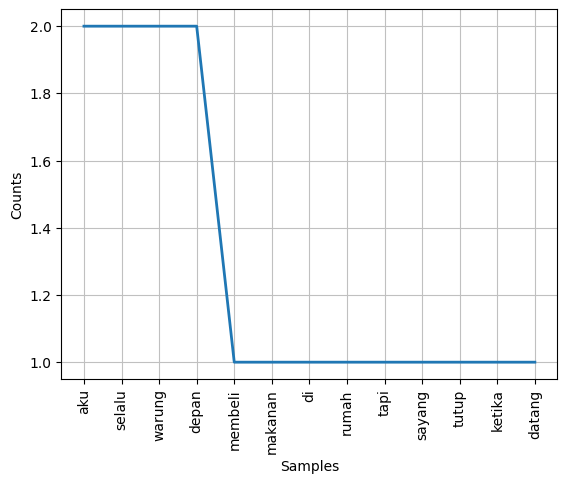

In [20]:
import matplotlib.pyplot as plt

kemunculan.plot(30, cumulative=False)

plt.show()

## Tokenizing: Sentences Tokenizing Using NLTK Module ##
Memisahkan kalimat dalam sebuah paragraf.

In [23]:
from nltk.tokenize import sent_tokenize

kalimat = "Aku selalu membeli makanan di warung depan rumah. Tapi sayang warung depan selalu tutup ketika aku datang."

tokens = nltk.tokenize.sent_tokenize(kalimat)

print(tokens)

['Aku selalu membeli makanan di warung depan rumah.', 'Tapi sayang warung depan selalu tutup ketika aku datang.']


## Filtering using NLTK ##

In [31]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

kalimat = "Andi dan icha kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

tokens = word_tokenize(kalimat)
listStopword = set(stopwords.words('Indonesian'))

removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)

print(removed)

OSError: ignored

## Filtering using Sastrawi: Stopword List ##
Melihat daftar _stopword_ pada Sastrawi.

In [32]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

ModuleNotFoundError: ignored

## Filtering using Sastrawi ##

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

stop = stopword.remove(kalimat)
tokens = nltk.tokenize.word_tokenize(stop)

print(tokens)

['andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'lebih', 'praktis', 'murah']


## Add Custom Stopword ##
Menambahkan kata di _stopword_ untuk dihilangkan pada sebuah teks.

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from nltk.tokenize import word_tokenize

# ambil stopword bawaan
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['daring', 'online']

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

# menggabungkan stopword
data = stop_factory + more_stopword

dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)
tokens = nltk.tokenize.word_tokenize(str.remove(kalimat))

print(tokens)

['andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'daring', 'andi', 'belanja', 'online', 'lebih', 'praktis', 'murah']


## Stemming : Porter Stemming Algorithm using NLTK ##

https://tartarus.org/martin/PorterStemmer/index-old.html

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

kata = ["program", "programs", "programer", "programing", "programers"]

for k in kata:
    print(k, " : ", ps.stem(k))

program  :  program
programs  :  program
programer  :  program
programing  :  program
programers  :  program


## Stemming Bahasa Indonesia using Sastrawi ##

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & menyenangkan."

hasil = stemmer.stem(kalimat)

hasil


'andi kerap laku transaksi rutin cara daring atau online turut andi belanja online lebih praktis senang'

Referensi Artikel:

https://medium.com/@ksnugroho/dasar-text-preprocessing-dengan-python-a4fa52608ffe